In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from sklearn.metrics import classification_report

In [2]:
import cv2 as cv

In [3]:
#DataSet Directories
train_data_dir = "C:/ComputerVision/Data/train"
test_data_dir = "C:/ComputerVision/Data/test"

img_size = 48
categories = ['REAL', 'FAKE']

def load_data(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img))
                resized_array = cv.resize(img_array, (img_size, img_size))
                resized_array = resized_array / 255.0
                data.append([resized_array, class_num])
            except Exception as e:
                pass
    return data

In [4]:
training_data = load_data(train_data_dir, categories, img_size)

In [5]:
testing_data = load_data(test_data_dir, categories, img_size)

In [6]:
# Load and preprocess the data
random.shuffle(training_data)
random.shuffle(testing_data)

X_train = []
y_train = []
X_test = []
y_test = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [7]:
# Creating the model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\mshrv\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 108s 33ms/step - accuracy: 0.7476 - loss: 0.5020 - val_accuracy: 0.8642 - val_loss: 0.3204
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - accuracy: 0.8746 - loss: 0.3018 - val_accuracy: 0.9056 - val_loss: 0.2291
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - accuracy: 0.8949 - loss: 0.2556 - val_accuracy: 0.9041 - val_loss: 0.2390
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - accuracy: 0.9049 - loss: 0.2319 - val_accuracy: 0.9211 - val_loss: 0.2050
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - accuracy: 0.9133 - loss: 0.2138 - val_accuracy: 0.9104 - val_loss: 0.2212
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - accuracy: 0.9171 - loss: 0.2034 - val_accuracy: 0.9197 - val_loss: 0.1987
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - accuracy: 0.9233 - loss: 0.1925 - val_accuracy: 0.9196 - val_loss: 0.2029
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 96s 31ms/step - accuracy: 0.9256 

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Predictions
y_pred = model.predict(X_test)
y_predicted = (y_pred > 0.5).astype("int32").flatten()

# Classification report
print(classification_report(y_test, y_predicted))

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9274 - loss: 0.1900
Test accuracy: 0.9294000267982483
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10000
           1       0.97      0.88      0.93     10000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



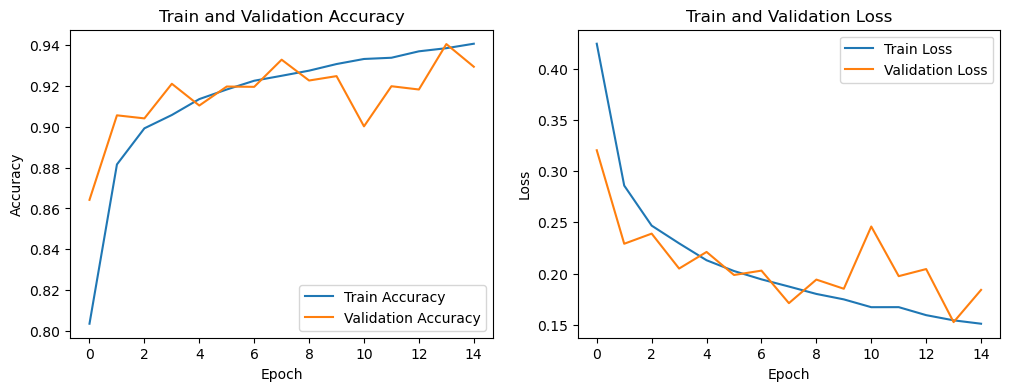

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.show()

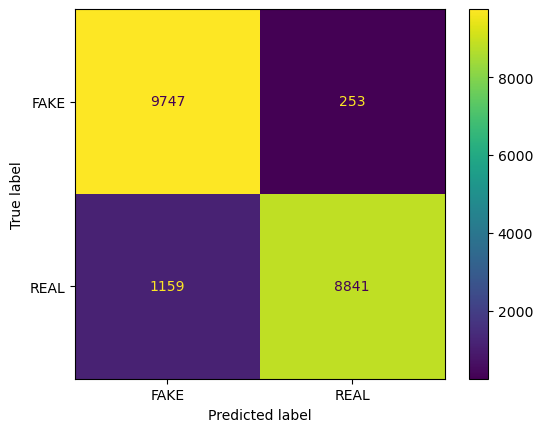

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_predicted)  # Fixed the argument order
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['FAKE', 'REAL'])
cm_display.plot()
plt.show()

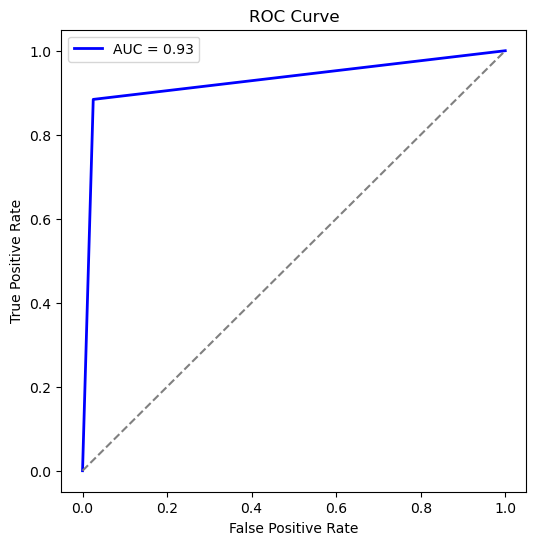

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
model.save("CNN_Model.h5")
model.save("REAL_FAKE_CNN_Model.keras")